# SMILING FACES DETECTOR


# STEP #1: PROBLEM STATEMENT AND BUSINESS CASE

- The dataset contains a series of images that can be used to solve the Happy House problem! 
- We need to build an artificial neural network that can detect smiling faces.
- Only smiling people will be allowed to enter the house!
- The train set has 600 examples. The test set has 150 examples.
- Data Source: https://www.kaggle.com/iarunava/happy-house-dataset


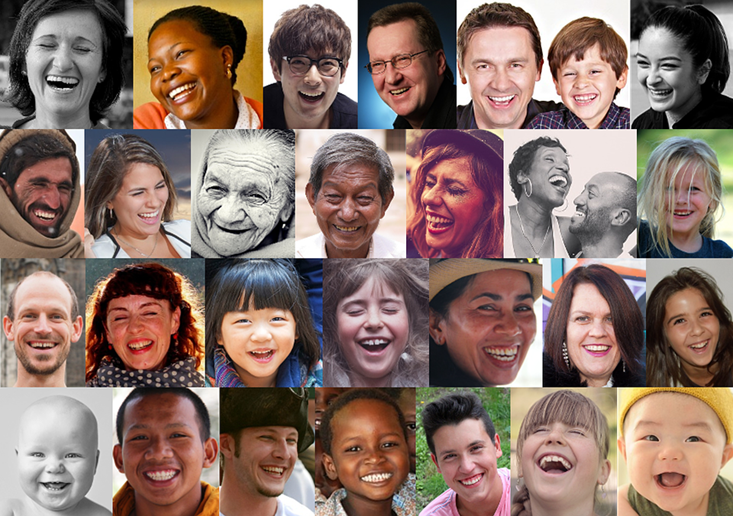

# IMPORTING DATA

In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import h5py
import random 

In [2]:
filename = 'train_happy.h5'
f = h5py.File(filename, 'r')

for key in f.keys():
    print(key) #Names of the groups in HDF5 file.


list_classes
train_set_x
train_set_y


In [3]:
happy_training = h5py.File('train_happy.h5', "r")
happy_testing  = h5py.File('test_happy.h5', "r")

In [4]:
X_train = np.array(happy_training["train_set_x"][:]) 
y_train = np.array(happy_training["train_set_y"][:]) 

X_test = np.array(happy_testing["test_set_x"][:])
y_test = np.array(happy_testing["test_set_y"][:]) 


In [5]:
X_train

array([[[[178, 190, 163],
         [172, 181, 173],
         [188, 196, 184],
         ...,
         [255, 255, 254],
         [254, 255, 250],
         [249, 253, 222]],

        [[184, 201, 165],
         [149, 154, 142],
         [149, 158, 139],
         ...,
         [255, 255, 253],
         [254, 255, 250],
         [251, 255, 230]],

        [[198, 207, 165],
         [141, 147, 128],
         [168, 184, 154],
         ...,
         [253, 255, 244],
         [254, 255, 248],
         [253, 255, 233]],

        ...,

        [[ 77,  82,  89],
         [ 60,  64,  68],
         [ 49,  53,  55],
         ...,
         [ 31,  32,  30],
         [ 47,  48,  46],
         [ 75,  75,  75]],

        [[ 68,  71,  76],
         [ 55,  58,  59],
         [ 44,  47,  47],
         ...,
         [ 30,  31,  29],
         [ 40,  41,  39],
         [ 63,  64,  63]],

        [[ 61,  64,  66],
         [ 52,  54,  54],
         [ 45,  47,  46],
         ...,
         [ 30,  31,  29],
        

In [6]:
X_train.shape

(600, 64, 64, 3)

In [7]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [8]:
y_train.shape

(600,)

# VISUALIZATION OF THE DATASET  

1


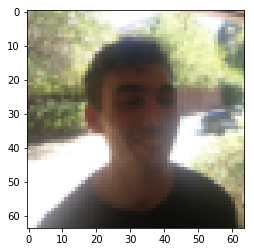

In [9]:
i = random.randint(1,600) # select any random index from 1 to 600
plt.imshow( X_train[i] )
print(y_train[i])


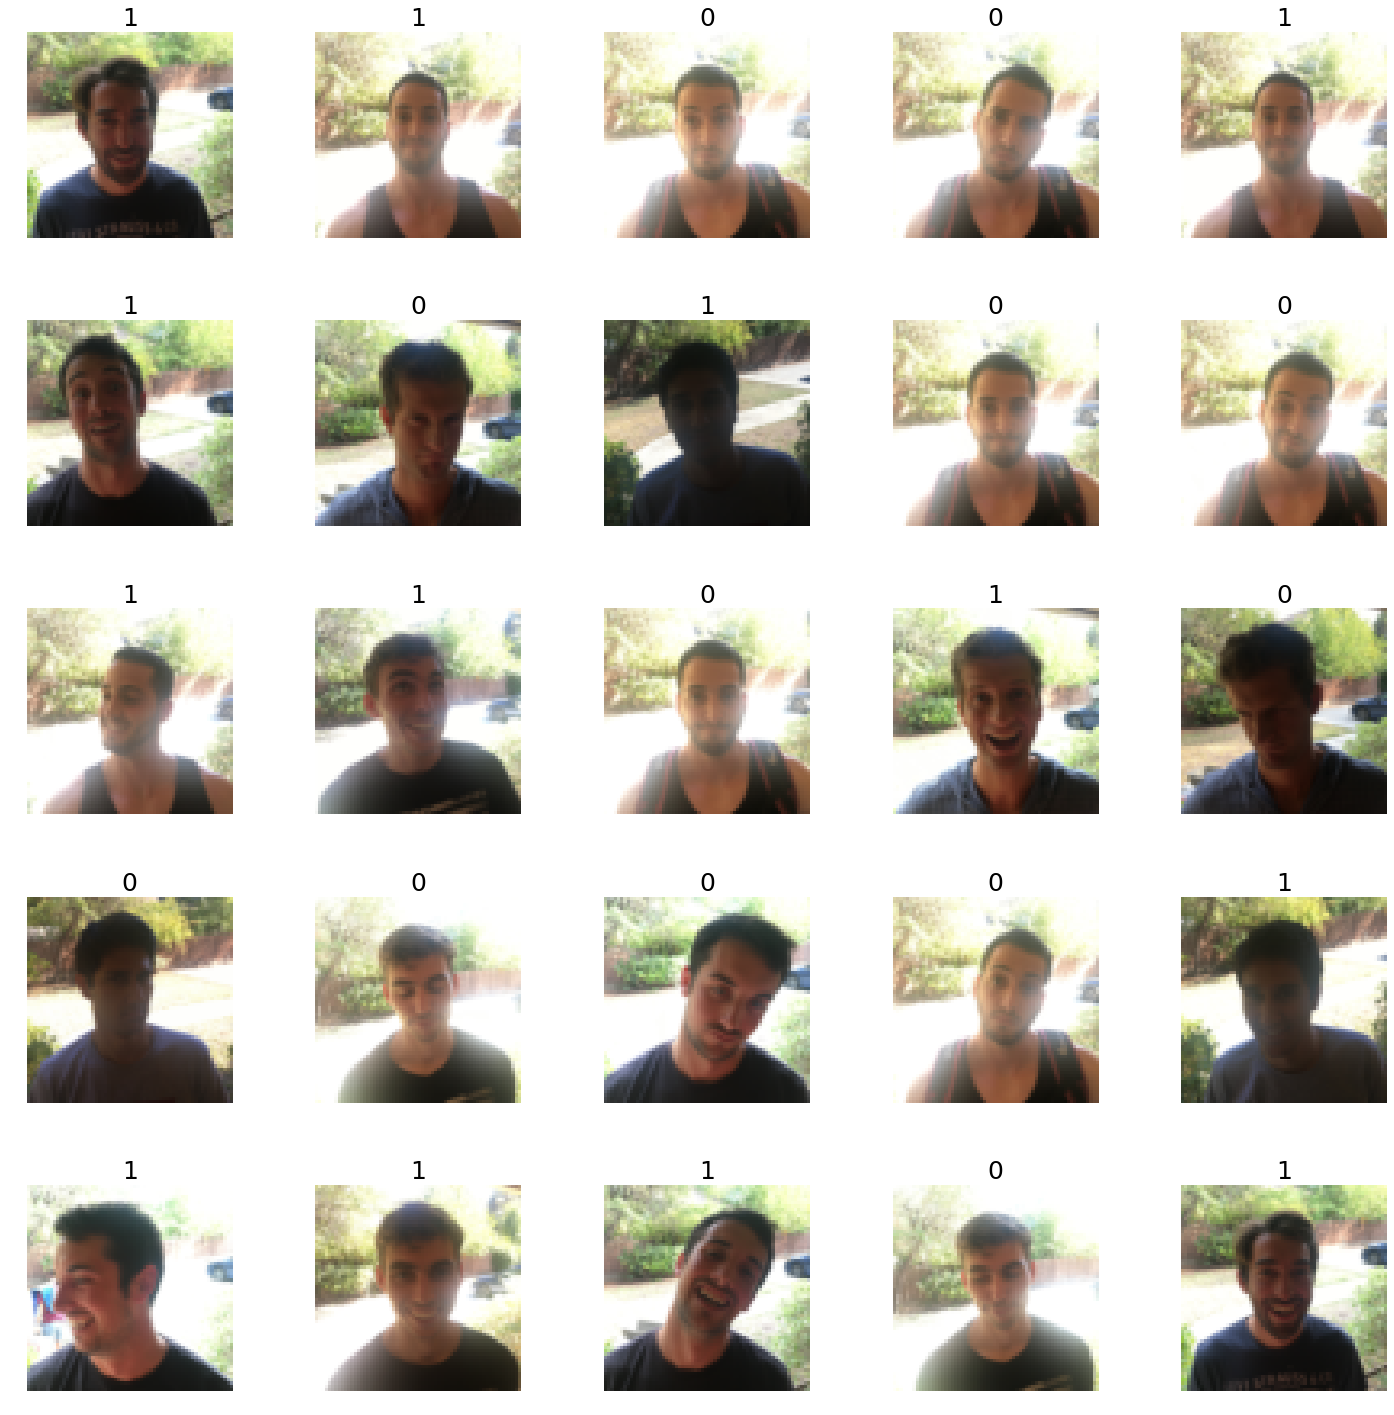

In [10]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25,25))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 25)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# TRAINING THE MODEL

In [11]:
# Let's normalize dataset
X_train = X_train/255
X_test = X_test/255


In [12]:
X_train

array([[[[0.69803922, 0.74509804, 0.63921569],
         [0.6745098 , 0.70980392, 0.67843137],
         [0.7372549 , 0.76862745, 0.72156863],
         ...,
         [1.        , 1.        , 0.99607843],
         [0.99607843, 1.        , 0.98039216],
         [0.97647059, 0.99215686, 0.87058824]],

        [[0.72156863, 0.78823529, 0.64705882],
         [0.58431373, 0.60392157, 0.55686275],
         [0.58431373, 0.61960784, 0.54509804],
         ...,
         [1.        , 1.        , 0.99215686],
         [0.99607843, 1.        , 0.98039216],
         [0.98431373, 1.        , 0.90196078]],

        [[0.77647059, 0.81176471, 0.64705882],
         [0.55294118, 0.57647059, 0.50196078],
         [0.65882353, 0.72156863, 0.60392157],
         ...,
         [0.99215686, 1.        , 0.95686275],
         [0.99607843, 1.        , 0.97254902],
         [0.99215686, 1.        , 0.91372549]],

        ...,

        [[0.30196078, 0.32156863, 0.34901961],
         [0.23529412, 0.25098039, 0.26666667]

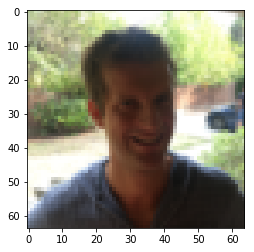

In [13]:
plt.imshow(X_train[9])

In [14]:
X_train.shape

(600, 64, 64, 3)

In [15]:
y_train.shape

(600,)

In [16]:
# Import train_test_split from scikit library
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard



Using TensorFlow backend.


In [17]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64, 6, 6, input_shape = (64,64,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(64, 5, 5, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(output_dim = 128, activation = 'relu'))
cnn_model.add(Dense(output_dim = 1, activation = 'sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\jigzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (6, 6), input_shape=(64, 64, 3..., activation="relu")`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\jigzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu")`
  
C:\Users\jigzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  if sys.path[0] == '':
C:\Users\jigzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  del sys.path[0]


In [18]:
cnn_model.compile(loss ='binary_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

In [19]:
epochs = 25

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 30,
                        nb_epoch = epochs,
                        verbose = 1)



Instructions for updating:
Use tf.cast instead.


C:\Users\jigzz\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  import sys


Epoch 1/25
600/600 [==============================] - 13s 22ms/step - loss: 0.9063 - acc: 0.5067
Epoch 2/25
600/600 [==============================] - 11s 19ms/step - loss: 0.6756 - acc: 0.6367
Epoch 3/25
600/600 [==============================] - 11s 18ms/step - loss: 0.6017 - acc: 0.7317
Epoch 4/25
600/600 [==============================] - 12s 19ms/step - loss: 0.5297 - acc: 0.7217
Epoch 5/25
600/600 [==============================] - 11s 19ms/step - loss: 0.3765 - acc: 0.8367
Epoch 6/25
600/600 [==============================] - 11s 19ms/step - loss: 0.2653 - acc: 0.8983
Epoch 7/25
600/600 [==============================] - 12s 20ms/step - loss: 0.2811 - acc: 0.8650
Epoch 8/25
600/600 [==============================] - 11s 19ms/step - loss: 0.2340 - acc: 0.9117
Epoch 9/25
600/600 [==============================] - 11s 19ms/step - loss: 0.2253 - acc: 0.9117
Epoch 10/25
600/600 [==============================] - 11s 19ms/step - loss: 0.2029 - acc: 0.9400
Epoch 11/25
600/600 [========

# EVALUATING THE MODEL

In [20]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

150/150 [==============================] - 1s 6ms/step
Test Accuracy : 0.947


In [21]:
# get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test)


In [22]:
predicted_classes.shape

(150, 1)

In [23]:
y_test.shape

(150,)

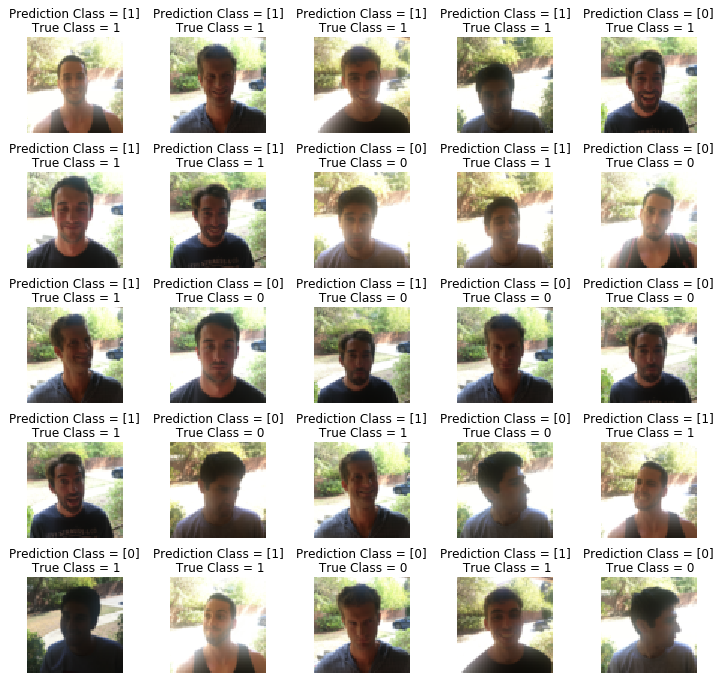

In [24]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction Class = {}\n True Class = {}".format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# axes[i].set_title("Guess{}\n True{}".format(predicted_class[i], y_test[i]))


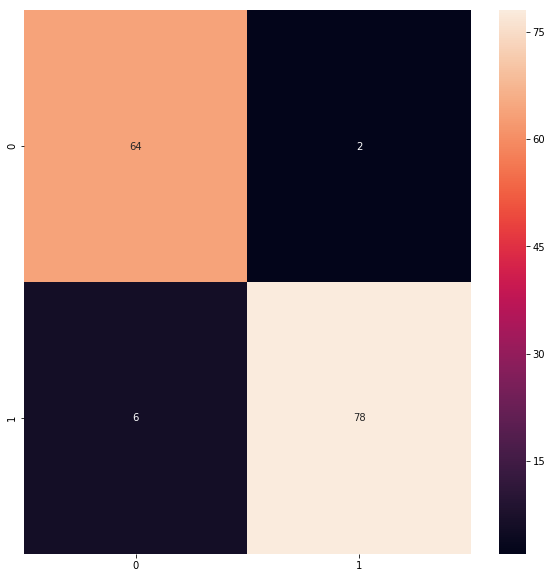

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [26]:
from sklearn.metrics import classification_report

print(classification_report(y_test.T, predicted_classes))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.97      0.93      0.95        84

   micro avg       0.95      0.95      0.95       150
   macro avg       0.94      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150

